In [6]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
pwd

'/content'

In [34]:
import h5py
h5f=h5py.File("/content/drive/MyDrive/Colab Notebooks/SVHN_single_grey1.h5",'r')
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [35]:
X_train=h5f["X_train"][:]
y_train=h5f["y_train"][:]
X_test=h5f["X_test"][:]
y_test=h5f["y_test"][:]

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


In [37]:
X_train

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]],

       [[ 86.9591,  87.0685,  88.3735, ...,  91.8014,  89.7477,
          92.5302],
        [ 86.688 ,  86.9114,  87.4337, ...,  90.7306,  87.204 ,
          88.5629],
        [ 85.9654,  85.8145,  85.9239, ...,  63.8626,  59.8199,
          54.8805],
        ...,
        [ 90.2236,  91.0448,  93.4637, ...,  55.3535,  48.5822,
          44.0557],
        [ 90.6427,  90.4039,  90.937 , ...,  78.2696,  77.4977,
          74.27  ],
        [ 88.0236,  88.1977,  86.6709, ...,  75.

In [38]:
y_train

array([2, 6, 7, ..., 7, 0, 4], dtype=uint8)

In [39]:
y_test

array([1, 7, 2, ..., 7, 9, 2], dtype=uint8)

In [40]:
X_test

array([[[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904,
         112.1646],
        [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475,
         109.9368],
        [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414,
         109.1048],
        ...,
        [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074,
         112.7346],
        [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 ,
         114.3431],
        [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017,
         114.1906]],

       [[115.1609, 114.161 , 113.1611, ..., 112.0302, 112.6711,
         112.7851],
        [110.5743, 110.2754, 108.9766, ..., 106.1448, 106.7857,
         107.0137],
        [102.8031, 102.5042, 101.7924, ...,  95.776 ,  95.531 ,
          95.645 ],
        ...,
        [169.8457, 170.6176, 167.8028, ...,  45.1708,  55.6967,
          62.81  ],
        [157.7329, 157.6189, 153.8042, ...,  42.9538,  50.1811,
          56.1805],
        [150.3207, 149.2068, 144.8051, ...,  42.

In [41]:
from tensorflow.keras.utils import to_categorical
y_test=to_categorical(y_test,num_classes=10)
y_train=to_categorical(y_train,num_classes=10)

In [42]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [43]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32)))
model.add(tf.keras.layers.BatchNormalization())
model.output_shape

(None, 1024)

In [129]:
model.add(Dense(300,activation="relu"))
model.add(tf.keras.layers.Dropout(0.25))

In [130]:
model.add(Dense(200,activation="relu"))
model.add(tf.keras.layers.Dropout(0.25))

In [131]:
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [132]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_22 (Dense)             (None, 300)               307500    
_________________________________________________________________
dropout_5 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 200)               60200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)              

In [133]:
model.fit(X_train,y_train,epochs=50,batch_size=200,validation_data=(X_test,y_test))

Epoch 1/50
210/210 [==============================] - 4s 19ms/step - loss: 1.5855 - accuracy: 0.4708 - val_loss: 0.9936 - val_accuracy: 0.6982
Epoch 2/50
210/210 [==============================] - 4s 19ms/step - loss: 1.0811 - accuracy: 0.6621 - val_loss: 0.8535 - val_accuracy: 0.7406
Epoch 3/50
210/210 [==============================] - 4s 19ms/step - loss: 0.9391 - accuracy: 0.7065 - val_loss: 0.7838 - val_accuracy: 0.7705
Epoch 4/50
210/210 [==============================] - 4s 18ms/step - loss: 0.8556 - accuracy: 0.7345 - val_loss: 0.7186 - val_accuracy: 0.7913
Epoch 5/50
210/210 [==============================] - 4s 19ms/step - loss: 0.7976 - accuracy: 0.7546 - val_loss: 0.6737 - val_accuracy: 0.7995
Epoch 6/50
210/210 [==============================] - 4s 19ms/step - loss: 0.7499 - accuracy: 0.7678 - val_loss: 0.6570 - val_accuracy: 0.8063
Epoch 7/50
210/210 [==============================] - 4s 19ms/step - loss: 0.7165 - accuracy: 0.7784 - val_loss: 0.6221 - val_accuracy: 0.8163

In [134]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.4776 - accuracy: 0.8667


In [135]:
pred=model.predict(X_test)

In [145]:
pred[2]

array([2.9941509e-07, 1.3285261e-05, 9.9990153e-01, 1.1997518e-05,
       6.7673786e-06, 7.7062549e-07, 5.8007352e-08, 3.7014142e-05,
       1.7801191e-05, 1.0587481e-05], dtype=float32)

In [144]:
import numpy as np
np.argmax(pred[2])

2

In [143]:
X_test[2]

array([[133.255 , 134.7279, 136.3148, ..., 103.7248, 100.8391, 100.6111],
       [134.2549, 135.8418, 138.3146, ..., 117.1965, 114.1968, 114.0828],
       [136.2547, 135.9558, 137.4287, ..., 126.8535, 123.7398, 123.4409],
       ...,
       [135.4136, 133.4847, 131.2569, ..., 129.0552, 131.642 , 133.4569],
       [129.3972, 128.7671, 127.8381, ..., 128.5822, 129.2832, 129.9842],
       [119.0823, 120.8649, 123.0496, ..., 128.1801, 127.8103, 128.2124]],
      dtype=float32)

In [142]:
y_test[2]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

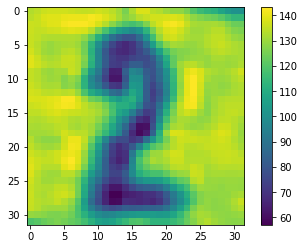

In [141]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(X_test[2])
plt.colorbar()
plt.grid(False)
plt.show()